# Project 1: Infrared Spectral Energy Distributions

In [2]:
# Date created: Oct 9, 2020

In [35]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.ion()
plt.rcParams.update({'font.size': 16, 'text.usetex': True})

In [36]:
# constants

h = 6.626e-34 #[J*s]
k = 1.381e-23 #[J/K]


In [37]:
# Load data for NGC 0958
#data = np.genfromtxt('photandseds.csv', delimiter=', ', names=True)

# Failed attempt, can't load the data for some reason, going to hard code it for now

<ipython-input-38-6a2e4c49f486>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


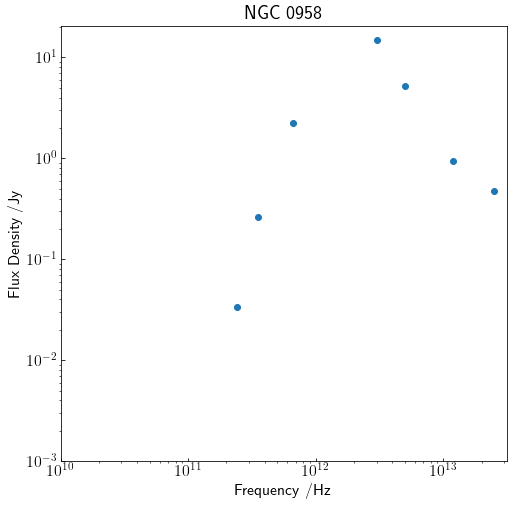

In [38]:
# hard code data, NGC 0958

frequencies_NGC = np.array([2.4e+11, 3.53e+11, 6.66e+11, 3e+12, 5e+12, 1.2e+13, 2.5e+13])
flux_densities_NGC = np.array([0.034, 0.262, 2.25, 14.99, 5.25, 0.94, 0.4735])
errors_NGC = np.array( [0.007, 0.034, 0.428, 0.212, 0.2625, 0.035, 0.0616] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_NGC, flux_densities_NGC, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('NGC 0958')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

<ipython-input-6-f169b238493a>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


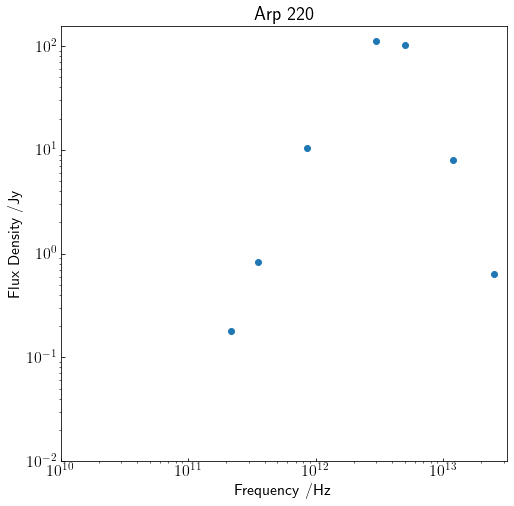

In [6]:
# Arp 220

frequencies_Arp = np.array( [2.17e+11, 3.53e+11, 8.57e+11, 3e+12, 5e+12, 1.2e+13, 2.5e+13] )
flux_densities_Arp = np.array( [0.178, 0.832, 10.5, 112, 103, 7.92, 0.64] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_Arp, flux_densities_Arp, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.01, 0.1, 1, 10, 100])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('Arp 220')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

<ipython-input-7-b42862b0f84a>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


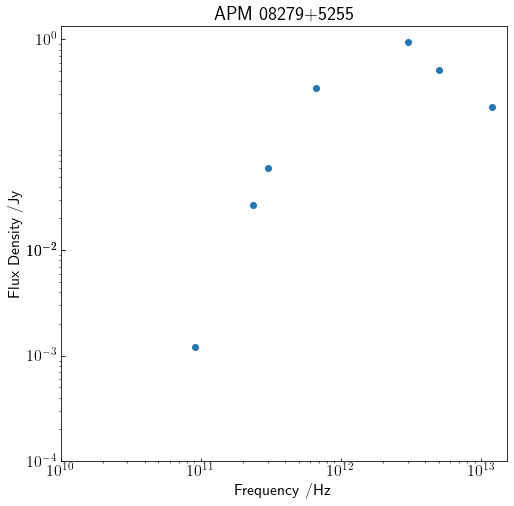

In [7]:
# APM 08279+5255

frequencies_APM = np.array( [9.08e+10, 2.37e+11, 3.02e+11, 6.66e+11, 3e+12, 5e+12, 1.2e+13] )
flux_densities_APM = np.array( [0.0012, 0.0266, 0.06, 0.342, 0.951, 0.511, 0.226] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_APM, flux_densities_APM, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.0001, 0.001, 0.01, 0.01, 1])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('APM 08279+5255')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()

In [129]:
def limit(nu, L, T, alpha, beta):
    return 3 + beta - ((10**nu)*h/(k*T))*np.exp(h*(10**nu)/(k*T))/(np.exp(h*(10**nu)/(k*T))-1) + alpha

def model1(freq, fit):
    L, T, alpha, beta = fit
    nu_prime = optimize.newton(limit, 12, args=(L, T, alpha, beta))
    L1 = ((10**L)*(10**nu_prime)**(3+beta)/(np.exp(h*(10**nu_prime)/(k*T))-1)/((10**nu_prime)**(-1*alpha)))
    predictions = []
    
    for nu in freq:
        if (nu < 10**nu_prime):
            predictions.append( 1e-26*(10**L)*(nu**(3+beta))/(np.exp(h*nu/(k*T))-1) )
        else:
            predictions.append( 1e-26*L1*(nu**(-1*alpha)) )
    return predictions

def penalty(param, freq, flux, error):
    return np.sum((model1(freq, param)-flux)**2/error**2)

In [135]:
fit = optimize.fmin(penalty, [-32, 28.8, 2.02, 1.5], args=(frequencies_NGC, flux_densities_NGC, errors_NGC))
ngc_fit = model1(frequencies_NGC, fit)

Optimization terminated successfully.
         Current function value: 20.570935
         Iterations: 421
         Function evaluations: 685


<ipython-input-136-23b45f4815db>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


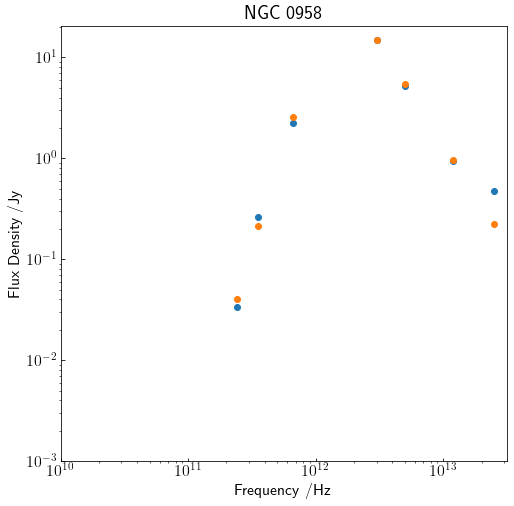

In [136]:
frequencies_NGC = np.array([2.4e+11, 3.53e+11, 6.66e+11, 3e+12, 5e+12, 1.2e+13, 2.5e+13])
flux_densities_NGC = np.array([0.034, 0.262, 2.25, 14.99, 5.25, 0.94, 0.4735])
errors_NGC = np.array( [0.007, 0.034, 0.428, 0.212, 0.2625, 0.035, 0.0616] )

f, ax = plt.subplots(1, figsize=(8,8))
ax.plot(frequencies_NGC, flux_densities_NGC, 'o')
ax.plot(frequencies_NGC, ngc_fit, 'o')
ax.set_xscale('log')
ax.set_xticks([1e+10, 1e+11, 1e+12, 1e+13])
ax.set_yscale('log')
ax.set_yticks([0.001, 0.01, 0.1, 1, 10])
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.set_title('NGC 0958')
ax.set_ylabel('Flux Density /Jy')
ax.set_xlabel('Frequency /Hz')
f.show()